In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df=pd.read_csv('/content/movie.csv')

In [4]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
df.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [6]:
df.columns

Index(['text', 'label'], dtype='object')

In [7]:
df.shape

(40000, 2)

In [8]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
df.isnull().sum()

,0
text,0
label,0


In [10]:
df.duplicated().sum()

np.int64(277)

In [11]:
df=df.drop_duplicates()

In [12]:
df['label'].unique()

array([0, 1])

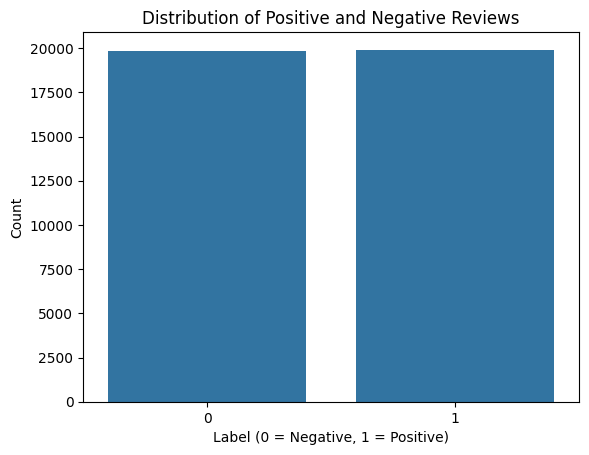

In [13]:
sns.countplot(x='label', data=df)

plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Label (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

#Data Pre-Processing

Convert to lower case

In [14]:
df['lower_text']=df['text'].str.lower()

Remove special charectars and emoji

In [15]:
df['removed_text'] = df['lower_text'].astype(str).str.replace(r'[^\x00-\x7F]+', '', regex=True)
df['removed_text'] = df['lower_text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

Tokenization using nltk

In [16]:
df['tokens']=df['removed_text'].apply(word_tokenize)

Stemming

In [17]:
stemmer=PorterStemmer()
df['stemming']=df['tokens'].apply(lambda x: [stemmer.stem(y) for y in x])

Lametization

In [ ]:
nlp=spacy.load('en_core_web_sm')
df['lametization']=df['tokens'].apply(lambda x: [nlp(y)[0].lemma_ for y in x])

Tokenization using Tensorflow

In [18]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['removed_text'])
df['sequences'] = tokenizer.texts_to_sequences(df['removed_text'])

Joining tokens

In [19]:
df['joined_stemming_tokens'] = df['stemming'].apply(lambda y: ' '.join(y))

In [ ]:
df['joined_lammetization_tokens'] = df['lametization'].apply(lambda x: ' '.join(x))

Test/Train Split

In [20]:
X = df['joined_stemming_tokens']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Extraction


One Hot Encoding

In [21]:
vectorizer1 = CountVectorizer(binary=True)
X = vectorizer1.fit_transform(df['joined_stemming_tokens'])
##one_hot_df_s = pd.DataFrame(X.toarray(), columns=vectorizer1.get_feature_names_out())

In [ ]:
vectorizer2 = CountVectorizer(binary=True)
Y = vectorizer2.fit_transform(df['joined_lammetization_tokens'])
one_hot_df_l = pd.DataFrame(Y.toarray(), columns=vectorizer2.get_feature_names_out())

Bag of Words

In [22]:
vectorizer3 = CountVectorizer()
X_bow = vectorizer3.fit_transform(df['joined_stemming_tokens'])
##bow_df_s = pd.DataFrame(X_bow.toarray(), columns=vectorizer3.get_feature_names_out())

In [ ]:
vectorizer4 = CountVectorizer()
Y_bow = vectorizer4.fit_transform(df['joined_lammetization_tokens'])
bow_df_l = pd.DataFrame(Y_bow.toarray(), columns=vectorizer4.get_feature_names_out())

Tf-Idf

In [23]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer()
Y_tfidf = tfidf_vectorizer1.fit_transform(df['joined_lammetization_tokens'])
tfidf_df_l = pd.DataFrame(Y_tfidf.toarray(), columns=tfidf_vectorizer1.get_feature_names_out())

Word2Vec

Count Vectorizer

In [24]:
vectorizer = CountVectorizer(binary=True)
X_train_bin = vectorizer.fit_transform(X_train)
X_test_bin = vectorizer.transform(X_test)

#Logistic Regression

In [25]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
y_pred_prob = model.predict_proba(X_test_vec)[:, 1]

Accuracy Score

In [26]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

Accuracy Score: 0.8896161107614852


F1 Score

In [27]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8909068292076129


ROC-AUC Score

In [28]:
roc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc)

ROC-AUC Score: 0.9571182986707445


Confusion Matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3487  504]
 [ 373 3581]]


#Bernoulli Naive Bayes Classifier

In [30]:
bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)
y_pred0 = bnb.predict(X_test_bin)
y_pred_prob0 = bnb.predict_proba(X_test_bin)[:, 1]

Accuracy Score

In [31]:
ac = accuracy_score(y_test, y_pred0)
print("Accuracy Score:", acc)

Accuracy Score: 0.8896161107614852


F1 Score

In [32]:
f1 = f1_score(y_test, y_pred0)
print("F1 Score:", f1)

F1 Score: 0.8499871564346263


ROC-AUC Score

In [33]:
roc = roc_auc_score(y_test, y_pred_prob0)
print("ROC-AUC Score:", roc)

ROC-AUC Score: 0.9232106648152578


Confusion Matrix

In [34]:
cm = confusion_matrix(y_test, y_pred0)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3468  523]
 [ 645 3309]]


#SVM (Support Vector Machine)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)
y_pred1 = svm.predict(X_test_vec)
y_pred_prob1 = svm.predict_proba(X_test_vec)[:, 1]

Accuracy Score

In [ ]:
acc = accuracy_score(y_test, y_pred1)
print("Accuracy Score:", acc)

F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred1)
print("F1 Score:", f1)

ROC-AUC Score

In [ ]:
roc = roc_auc_score(y_test, y_pred_prob1)
print("ROC-AUC Score:", roc)

Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", cm)

#Random Forest

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred7 = rf_model.predict(X_test_vec)
y_pred_prob7 = rf_model.predict_proba(X_test_vec)[:, 1]

Accuracy Score

In [42]:
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy Score: ",accuracy)

Accuracy Score:  0.8338577721837633


F1 Score

In [43]:
f1 = f1_score(y_test, y_pred7)
print("F1 Score: ", f1)

F1 Score:  0.8324873096446701


ROC-AUC Score

In [47]:
roc_auc = roc_auc_score(y_test, y_pred_prob7)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9164480095389131


Confusion matrix

In [48]:
cm = confusion_matrix(y_test, y_pred7)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3345  646]
 [ 674 3280]]
